# CS235 Fall 2024 Course Project

Name: Akshaya Samant (862548048)


## Introduction
In this project, a number of data
mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

In [ ]:
!pip install ucimlrepo

## Imports

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

## Load Data

In [ ]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets



# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

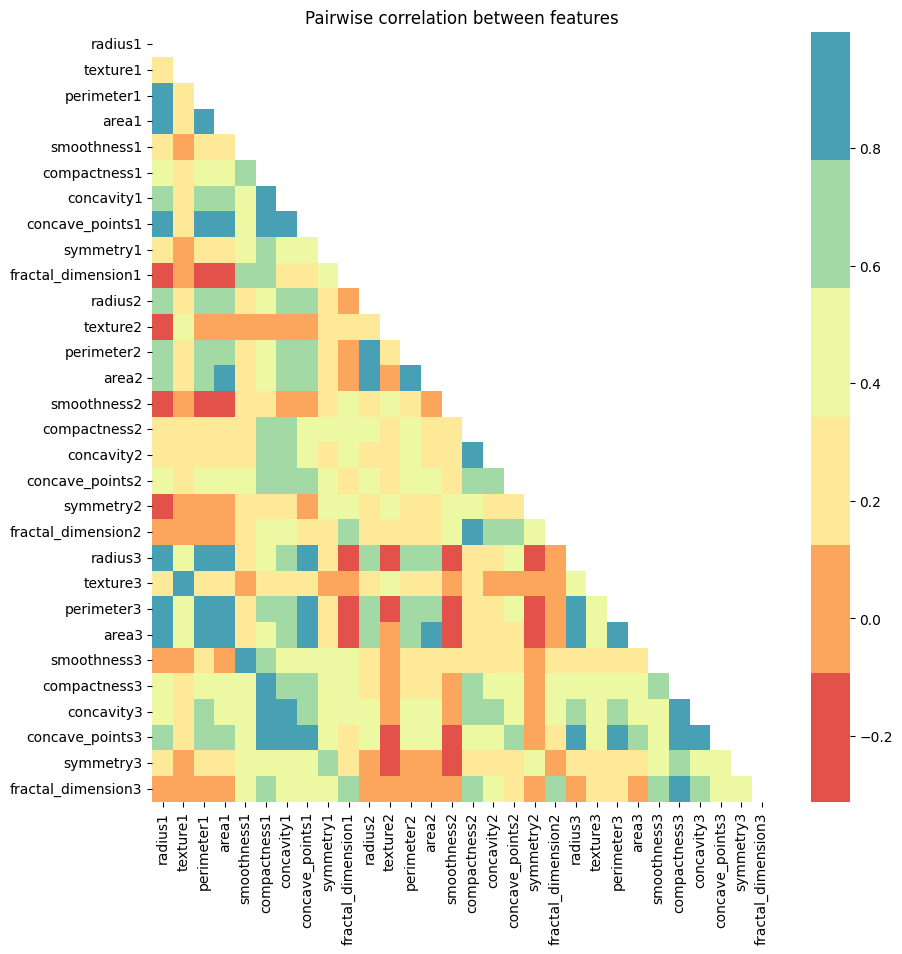

In [ ]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class-wise counts

In [ ]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

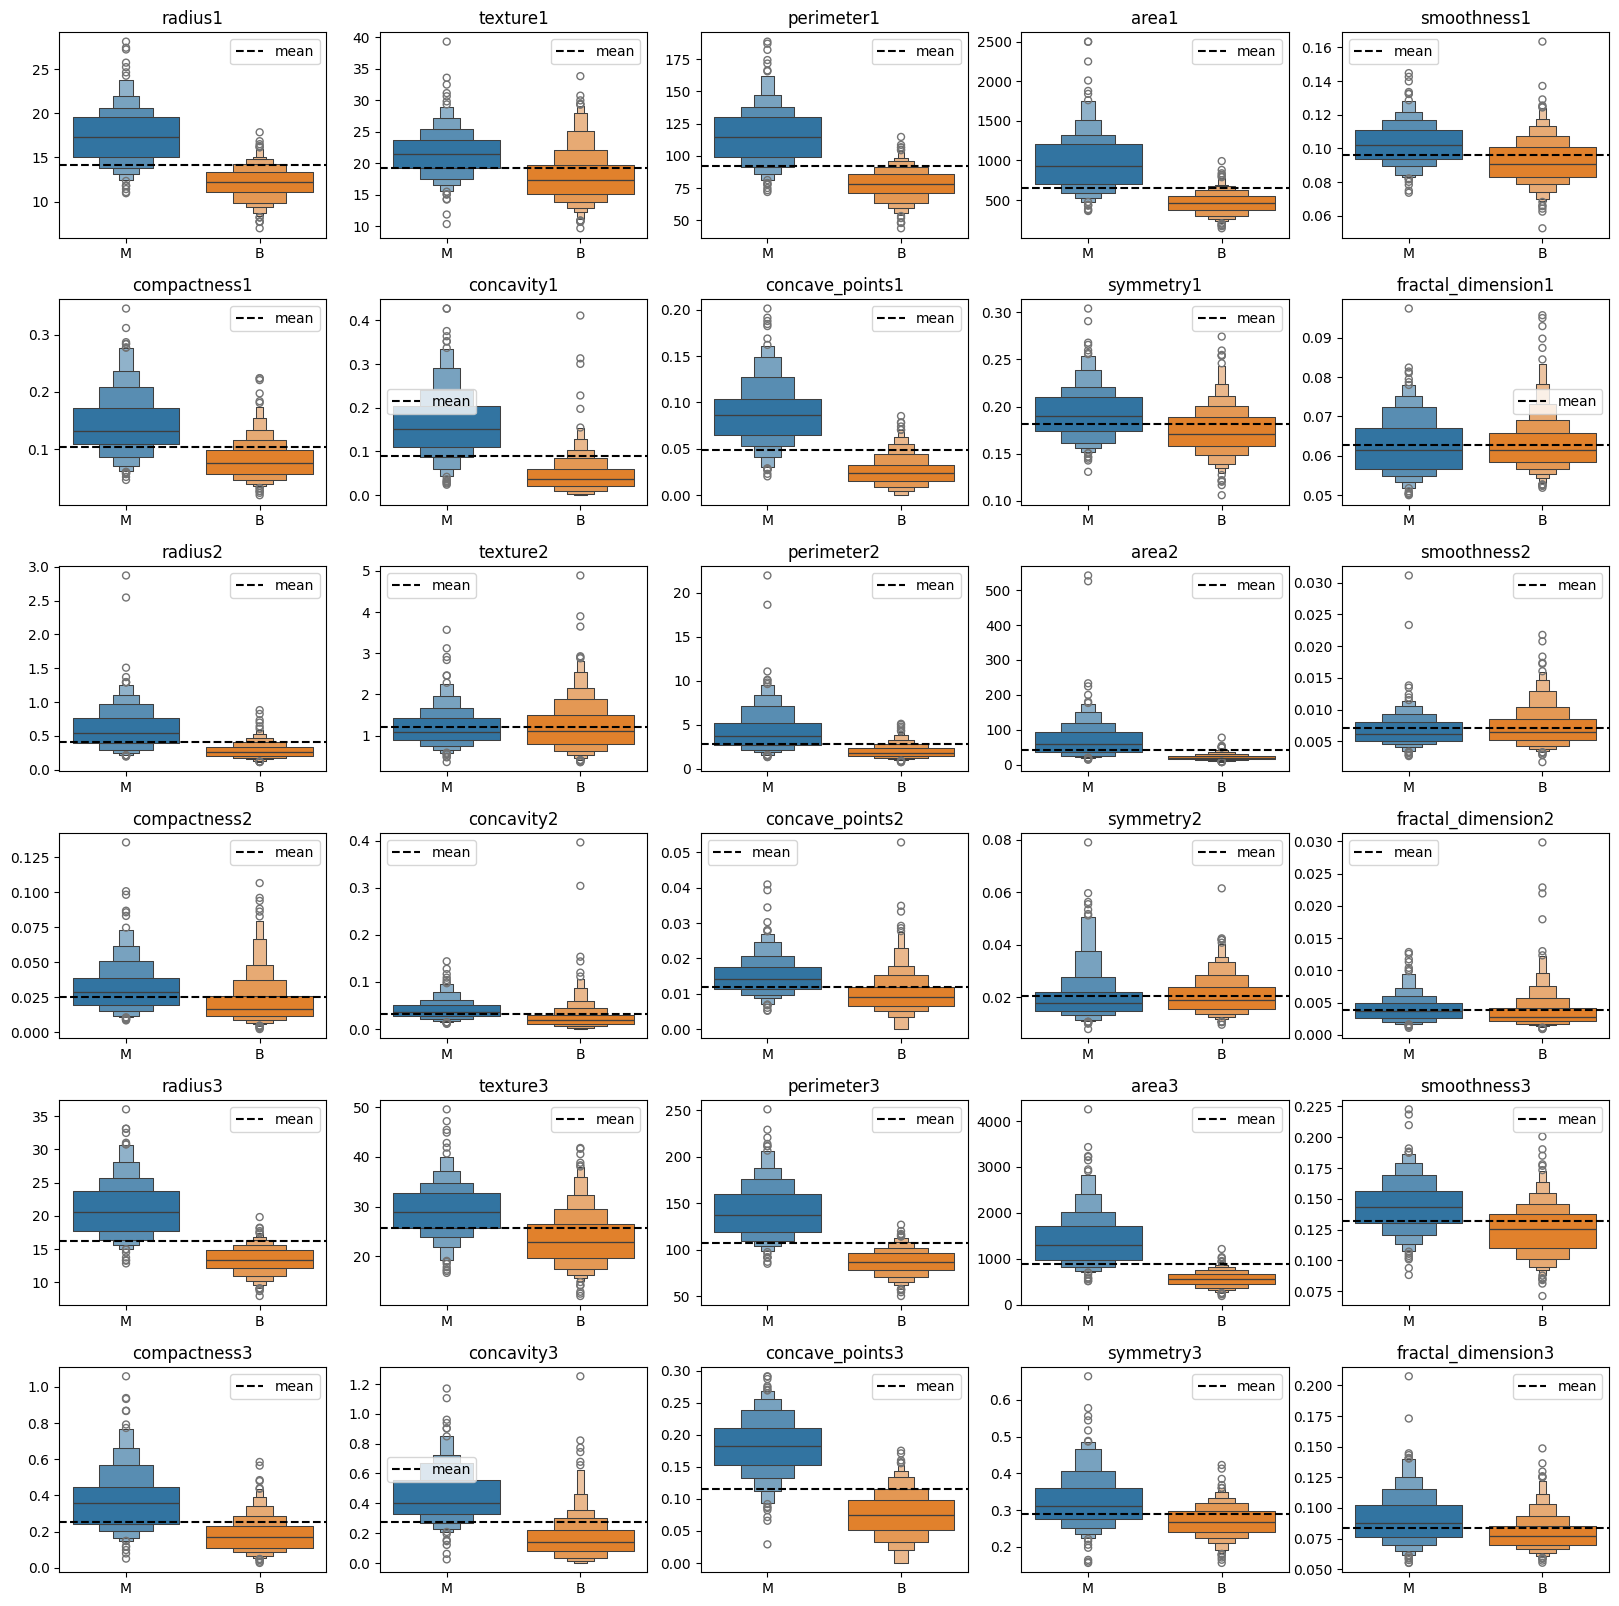

In [ ]:
plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(6,5,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.ylabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers



In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Ensure that y is a 1D array of integers
y_encoded = LabelEncoder().fit_transform(y)

# Function to calculate entropy
def entropy(y):
    counts = np.bincount(y)  # Ensure y is integer-encoded
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Custom Decision Tree Classifier Implementation
class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    # Function to calculate information gain
    def information_gain(self, left_y, right_y, parent_entropy):
        left_entropy = entropy(left_y)
        right_entropy = entropy(right_y)
        n = len(left_y) + len(right_y)
        weighted_entropy = (len(left_y) / n) * left_entropy + (len(right_y) / n) * right_entropy
        return parent_entropy - weighted_entropy

    # Function to split dataset based on a feature and a threshold
    def split(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = X[:, feature_index] > threshold
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    # Function to find the best split
    def best_split(self, X, y):
        best_feature, best_threshold, best_gain = None, None, -np.inf
        parent_entropy = entropy(y)

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_X, right_X, left_y, right_y = self.split(X, y, feature_index, threshold)
                if len(left_y) > 0 and len(right_y) > 0:
                    gain = self.information_gain(left_y, right_y, parent_entropy)
                    if gain > best_gain:
                        best_feature, best_threshold, best_gain = feature_index, threshold, gain

        return best_feature, best_threshold
 # Recursive function to build the decision tree
    def build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return np.bincount(y).argmax()  # Return the most common class

        best_feature, best_threshold = self.best_split(X, y)
        if best_feature is None:
            return np.bincount(y).argmax()

        left_X, right_X, left_y, right_y = self.split(X, y, best_feature, best_threshold)
        left_branch = self.build_tree(left_X, left_y, depth + 1)
        right_branch = self.build_tree(right_X, right_y, depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold, 'left': left_branch, 'right': right_branch}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_instance(self, x, node):
        if isinstance(node, dict):
            feature = node['feature']
            threshold = node['threshold']
            if x[feature] <= threshold:
                return self.predict_instance(x, node['left'])
            else:
                return self.predict_instance(x, node['right'])
        else:
            return node

    def predict(self, X):
        return np.array([self.predict_instance(x, self.tree) for x in X])

# Evaluation Function
def evaluate_classifier(X, y, max_depth=None):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
        y_train, y_test = y[train_index], y[test_index]

        # Initialize and train custom decision tree classifier
        clf = CustomDecisionTreeClassifier(max_depth=max_depth)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate F1 score, precision, recall, and accuracy for the current fold
        f1_scores.append(f1_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    return {
        'mean_f1': np.mean(f1_scores),
        'std_f1': np.std(f1_scores),
        'mean_precision': np.mean(precision_scores),
        'std_precision': np.std(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'std_recall': np.std(recall_scores),
        'mean_accuracy': np.mean(accuracy_scores),
        'std_accuracy': np.std(accuracy_scores)
    }

# Evaluate the custom decision tree on the dataset
results = evaluate_classifier(X, y_encoded)

# Print results
print(f"Custom Decision Tree Classifier - Results:")
print(f"F1 Score: {results['mean_f1']:.4f}")
print(f"Precision: {results['mean_precision']:.4f}")
print(f"Recall: {results['mean_recall']:.4f}")
print(f"Accuracy: {results['mean_accuracy']:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Custom Decision Tree Classifier - Results:
F1 Score: 0.9097
Precision: 0.9113
Recall: 0.9147
Accuracy: 0.9333


This code defines a custom decision tree classifier that uses entropy and information gain to find optimal splits. It recursively builds a tree, predicts classes, and evaluates performance using 10-fold cross-validation, reporting F1 score, precision, recall, and accuracy.To implement the custom Decision Tree Classifier, we first set up functions to calculate entropy and information gain, allowing us to measure the quality of potential splits. The main structure of the classifier uses a recursive build_tree method to construct the decision tree by selecting the best feature and threshold at each node, based on maximizing information gain. Splitting of data for each feature threshold is handled by a split function, creating left and right branches. If a node becomes pure (only one class) or reaches the maximum depth, it becomes a leaf and returns the most common class. The fit method trains the model by initializing this recursive tree-building process, while the predict method classifies new instances by traversing the tree from root to leaf based on feature values. Lastly, to assess performance, we use 10-fold cross-validation to calculate metrics like F1 score, precision, recall, and accuracy, summarizing the classifier's reliability across balanced data splits.

Naive Bayes Classifier

In [ ]:
import math
from collections import defaultdict, Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        # Identify unique classes
        self.classes = set(y)

        for c in self.classes:
            X_c = [x for x, label in zip(X, y) if label == c]
            self.mean[c] = [sum(feature) / len(feature) for feature in zip(*X_c)]
            # Added a small constant to the variance to avoid zero or negative variance
            self.var[c] = [self._calculate_variance(feature, self.mean[c][i]) for i, feature in enumerate(zip(*X_c))]
            self.priors[c] = len(X_c) / len(X)

    def _calculate_variance(self, feature_values, mean):
        if len(feature_values) <= 1:
            return 1e-6
        else:

            return sum((x - mean) ** 2 for x in feature_values) / (len(feature_values) - 1) + 1e-6

    def _gaussian_pdf(self, class_idx, x):
        # Calculate the Gaussian probability density function
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        pdf_values = []
        for i in range(len(x)):
            exponent = math.exp(-((x[i] - mean[i]) ** 2) / (2 * var[i]))
            pdf_value = (1 / math.sqrt(2 * math.pi * var[i])) * exponent
            pdf_values.append(max(pdf_value, 1e-10))
        return pdf_values

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []

            for c in self.classes:
                prior = math.log(self.priors[c])
                conditional = sum(math.log(prob) for prob in self._gaussian_pdf(c, x))
                posterior = prior + conditional
                posteriors.append((posterior, c))

            y_pred.append(max(posteriors)[1])
        return y_pred


#Cross-validation
def evaluate_gnb(X, y):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in skf.split(X, y):

        X_train, X_test = X.iloc[train_index].to_numpy(), X.iloc[test_index].to_numpy()
        y_train, y_test = y[train_index], y[test_index]

        gnb = GaussianNaiveBayes()
        gnb.fit(X_train.tolist(), y_train.tolist())
        y_pred = gnb.predict(X_test.tolist())

        f1_scores.append(f1_score(y_test, y_pred,pos_label=1))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=1))
        recall_scores.append(recall_score(y_test, y_pred, pos_label=1))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    return {
        'mean_f1': np.mean(f1_scores),
        'std_f1': np.std(f1_scores),
        'mean_precision': np.mean(precision_scores),
        'std_precision': np.std(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'std_recall': np.std(recall_scores),
        'mean_accuracy': np.mean(accuracy_scores),
        'std_accuracy': np.std(accuracy_scores)
    }

gnb_results = evaluate_gnb(X, y_encoded)

print(f"Gaussian Naive Bayes - Results:")
print(f"F1 Score: {gnb_results['mean_f1']:.4f}")
print(f"Precision: {gnb_results['mean_precision']:.4f}")
print(f"Recall: {gnb_results['mean_recall']:.4f}")
print(f"Accuracy: {gnb_results['mean_accuracy']:.4f}")



Gaussian Naive Bayes - Results:
F1 Score: 0.9061
Precision: 0.9250
Recall: 0.8957
Accuracy: 0.9315


To solve for the Gaussian Naive Bayes solution, we began by defining the basic parameters of the classifier — the mean, variance and prior probability for each class .The fit() method implements these statistics for every feature in the dataset and includes protections such as a small additive constant to detect zero division error. The _gaussian_pdf() method calculates Gaussian probability density for each feature and ensures non-zero value by replacing it with a small number to avoid log error value. Predict: using these functions the  probability of each class given the sample point is calculated and finally choosing the class with the highest probability as the predicted class.
In the functionality evaluate_gnb(), we performed a stratified 10-fold cross-validation to evaluate the F1 score, precision, recall, and accuracy of the model

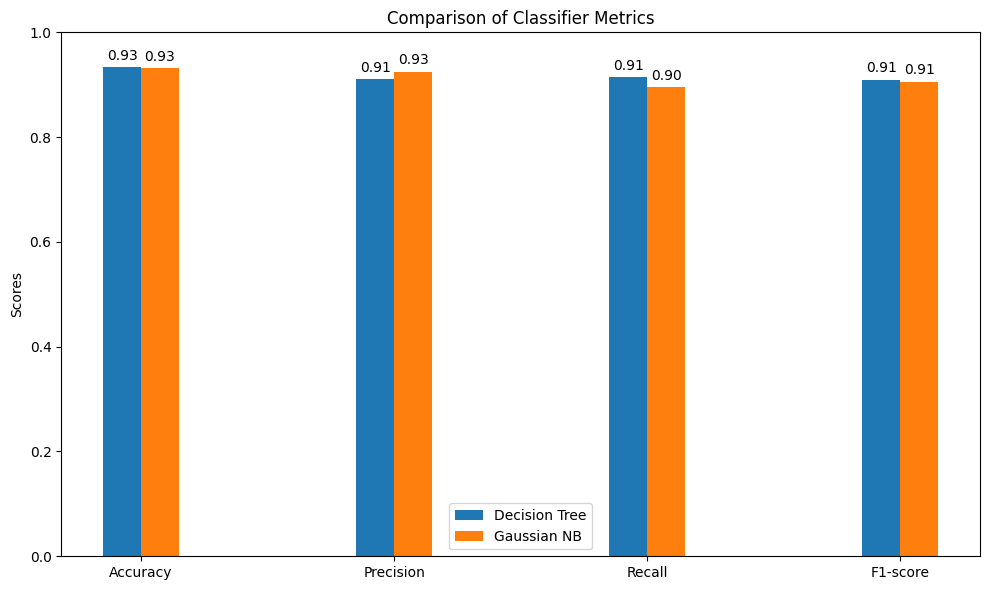

In [ ]:

classifiers = ['Custom Decision Tree', 'Gaussian Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

dt_results = [results['mean_accuracy'], results['mean_precision'], results['mean_recall'], results['mean_f1']]
gnb_results = [gnb_results['mean_accuracy'], gnb_results['mean_precision'], gnb_results['mean_recall'], gnb_results['mean_f1']]

# Create the plot
x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, dt_results, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, gnb_results, width, label='Gaussian NB')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Set y-axis limits for better visualization
ax.set_ylim([0, 1.0]) # adjust as needed

# Add labels to the bars (optional)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

## Q2 - Dimensionality reduction with the Singular Value Decomposition

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd

# Assuming CustomDecisionTreeClassifier and GaussianNaiveBayes are already defined and trained

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardize features before SVD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ranks to evaluate
ranks = [1, 2, 3, 5, 10, 15]
accuracy_results = {'DecisionTree': [], 'NaiveBayes': []}

for k in ranks:
    # Compute SVD on the training data
    U, Sigma, Vt = svd(X_train_scaled, full_matrices=False)
    X_train_svd = U[:, :k] @ np.diag(Sigma[:k])  # Reduce X_train to k dimensions
    X_test_svd = X_test_scaled @ Vt.T[:, :k]

    # Initialize classifiers
    classifiers = {
        'DecisionTree': CustomDecisionTreeClassifier(max_depth=5),
        'NaiveBayes': GaussianNaiveBayes()
    }

    # Evaluate each classifier
    for clf_name, clf in classifiers.items():
        clf.fit(X_train_svd, y_train)
        y_pred = clf.predict(X_test_svd)

        # Calculate accuracy and store results
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[clf_name].append(accuracy)



This code evaluates the performance of a custom decision tree and Gaussian Naive Bayes classifier on data transformed by Singular Value Decomposition (SVD). It standardizes the data, reduces it to various ranks (dimensions) using SVD, and then trains and tests each classifier at each rank level. For each rank, the code calculates and stores the accuracy of each classifier, allowing comparison of model performance across different levels of dimensionality reduction.

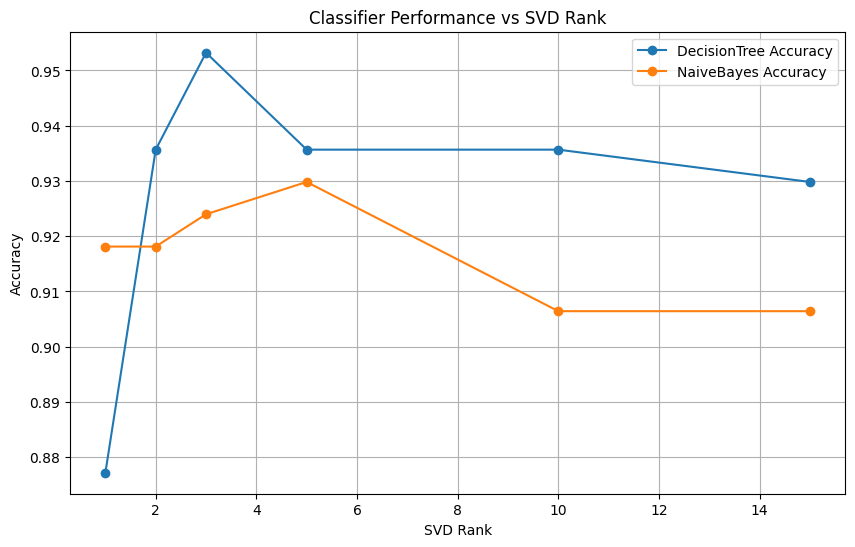

In [ ]:
# Plot the performance as a function of SVD rank
plt.figure(figsize=(10, 6))
for clf_name, accuracies in accuracy_results.items():
    plt.plot(ranks, accuracies, label=f'{clf_name} Accuracy', marker='o')

plt.xlabel('SVD Rank')
plt.ylabel('Accuracy')
plt.title('Classifier Performance vs SVD Rank')
plt.legend()
plt.grid()
plt.show()


## Q3 - Feature selection with randomization

In [ ]:

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score

# Assuming X and y are already defined
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into 20% for feature selection and 80% for evaluation
X_select, X_eval, y_select, y_eval = train_test_split(X_scaled, y_encoded, test_size=0.8, stratify=y_encoded, random_state=42)

def feature_importance_randomization(X, y, classifier, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    n_features = X.shape[1]
    feature_importance = np.zeros((n_features, n_splits))

    for feature in range(n_features):
        for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Original data
            clf_original = classifier()
            clf_original.fit(X_train.values, y_train)
            y_pred_original = clf_original.predict(X_val.values)
            original_score = f1_score(y_val, y_pred_original, average='weighted')

            # Randomized feature
            X_randomized = X_train.copy()
            X_randomized.iloc[:, feature] = np.random.permutation(X_randomized.iloc[:, feature])
            clf_randomized = classifier()
            clf_randomized.fit(X_randomized.values, y_train)
            y_pred_randomized = clf_randomized.predict(X_val.values)
            randomized_score = f1_score(y_val, y_pred_randomized, average='weighted')

            # Use absolute difference for importance
            feature_importance[feature, fold] =original_score - randomized_score

    # Normalize importance scores
    feature_importance = (feature_importance - np.min(feature_importance)) / (np.max(feature_importance) - np.min(feature_importance) + 1e-10)
    return feature_importance





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


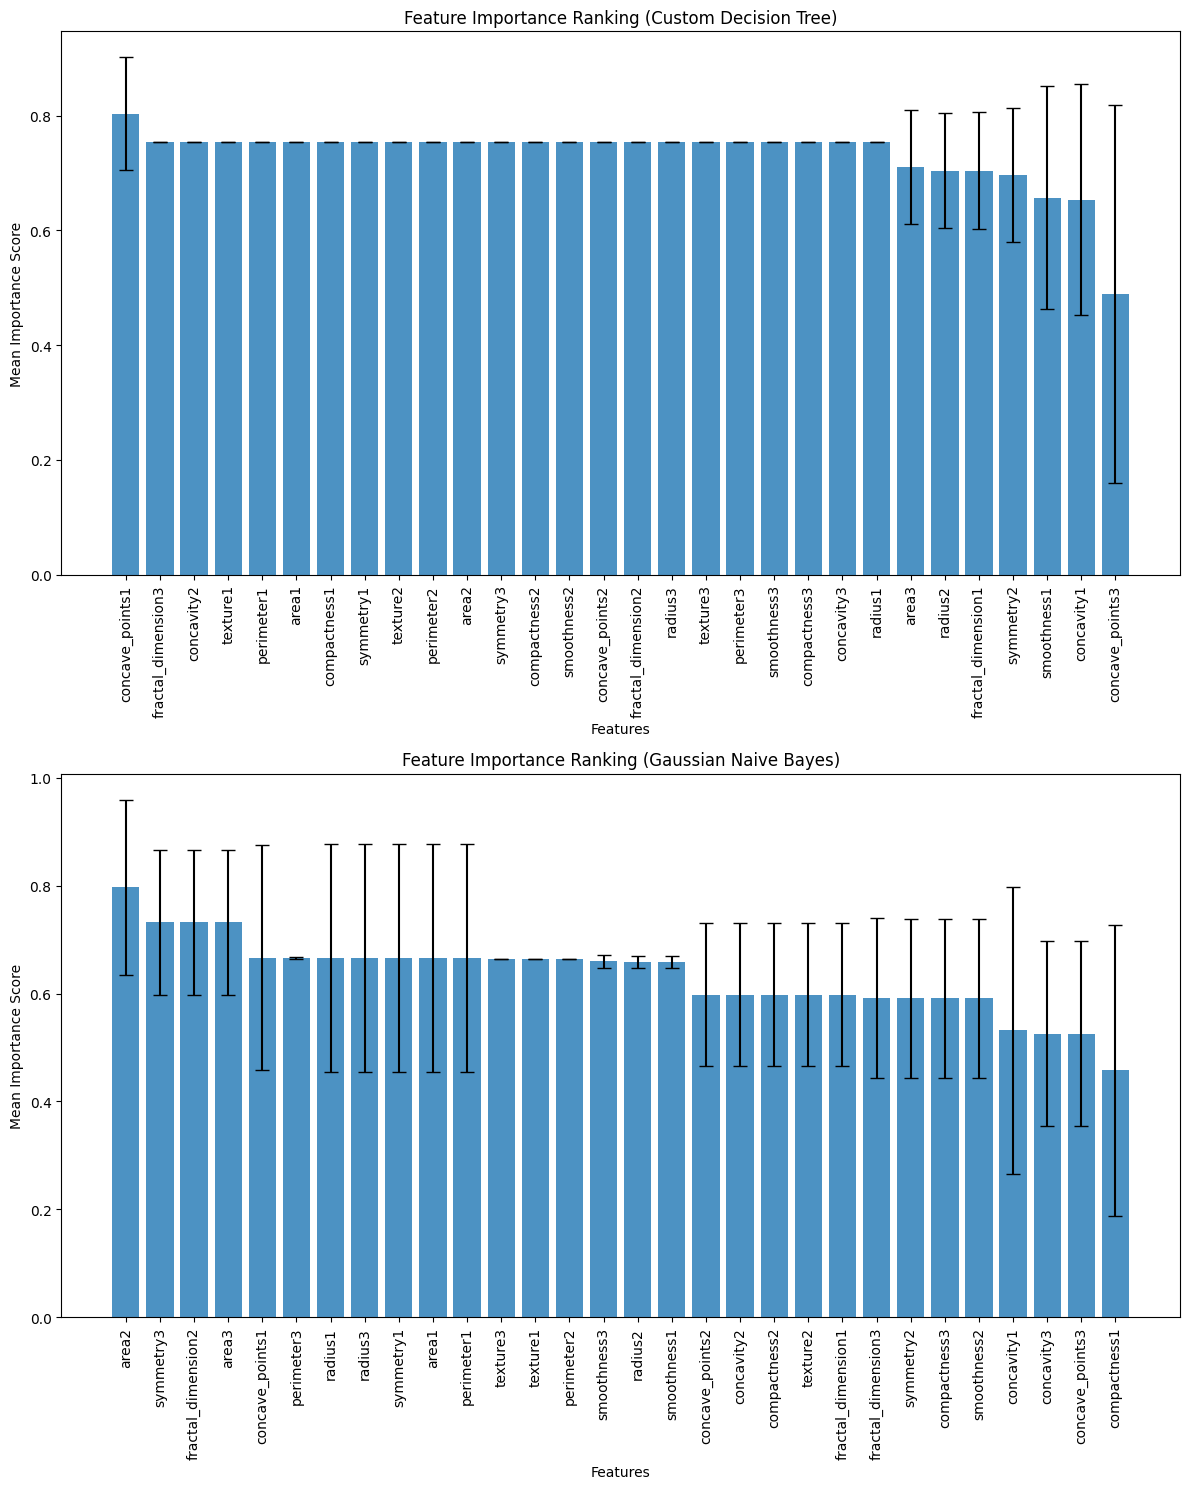

Custom Decision Tree - Mean F1: for all features 0.9168 ± 0.0349
Gaussian Naive Bayes - Mean F1: for all features 0.9358 ± 0.0348
Naive Bayes with top-10 features: Mean F1 = 0.9358 ± 0.0348
Decision Tree with top-10 features: Mean F1 = 0.9168 ± 0.0349


In [ ]:
# Calculate feature importance for both classifiers
dt_importance = feature_importance_randomization(X_select, y_select, CustomDecisionTreeClassifier)
nb_importance = feature_importance_randomization(X_select, y_select, GaussianNaiveBayes)

# Calculate mean and std of importance scores
dt_mean = np.mean(dt_importance, axis=1)
dt_std = np.std(dt_importance, axis=1)
nb_mean = np.mean(nb_importance, axis=1)
nb_std = np.std(nb_importance, axis=1)

# Sort features by importance
dt_sorted_idx = np.argsort(dt_mean)[::-1]
nb_sorted_idx = np.argsort(nb_mean)[::-1]

# Visualize feature ranking
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

# Decision Tree
ax1.bar(range(len(dt_mean)), dt_mean[dt_sorted_idx], yerr=dt_std[dt_sorted_idx], align='center', alpha=0.8, ecolor='black', capsize=5)
ax1.set_xlabel('Features')
ax1.set_ylabel('Mean Importance Score')
ax1.set_title('Feature Importance Ranking (Custom Decision Tree)')
ax1.set_xticks(range(len(dt_mean)))
ax1.set_xticklabels(X.columns[dt_sorted_idx], rotation=90)

# Naive Bayes
ax2.bar(range(len(nb_mean)), nb_mean[nb_sorted_idx], yerr=nb_std[nb_sorted_idx], align='center', alpha=0.8, ecolor='black', capsize=5)
ax2.set_xlabel('Features')
ax2.set_ylabel('Mean Importance Score')
ax2.set_title('Feature Importance Ranking (Gaussian Naive Bayes)')
ax2.set_xticks(range(len(nb_mean)))
ax2.set_xticklabels(X.columns[nb_sorted_idx], rotation=90)

plt.tight_layout()
plt.show()

# Select top 10 features
dt_top_10 = X.columns[dt_sorted_idx[:10]].tolist()
nb_top_10 = X.columns[nb_sorted_idx[:10]].tolist()

# Evaluation using top 10 features
X_eval_dt = X_eval[dt_top_10]
X_eval_nb = X_eval[nb_top_10]

# 10-fold cross-validation
def cross_validate(X, y, classifier, n_splits=10):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]

        clf = classifier()
        clf.fit(X_train.values, y_train)
        y_pred = clf.predict(X_val.values)
        scores.append(f1_score(y_val, y_pred, average='weighted'))

    return np.mean(scores), np.std(scores)

# Perform cross-validation
dt_mean, dt_std = cross_validate(X_eval_dt, y_eval, CustomDecisionTreeClassifier)
nb_mean, nb_std = cross_validate(X_eval_nb, y_eval, GaussianNaiveBayes)

# Cross-validation on top-10 features
nb_mean_top10, nb_std_top10 = cross_validate(X_eval[nb_top_10], y_eval, GaussianNaiveBayes)
dt_mean_top10, dt_std_top10 = cross_validate(X_eval[dt_top_10], y_eval, CustomDecisionTreeClassifier)

print(f"Custom Decision Tree - Mean F1: for all features {dt_mean:.4f} ± {dt_std:.4f}")
print(f"Gaussian Naive Bayes - Mean F1: for all features {nb_mean:.4f} ± {nb_std:.4f}")

print(f"Naive Bayes with top-10 features: Mean F1 = {nb_mean_top10:.4f} ± {nb_std_top10:.4f}")
print(f"Decision Tree with top-10 features: Mean F1 = {dt_mean_top10:.4f} ± {dt_std_top10:.4f}")

We implemented feature importance calculation to understand the role of each feature in our model after applying Singular Value Decomposition (SVD) for dimensionality reduction. We created a function called feature_importance_randomization that uses Stratified K-Fold cross-validation to maintain the distribution of classes in our dataset. For each feature, we trained our classifiers—either a custom decision tree or Gaussian Naive Bayes—on the original training data and noted the F1 score. Then, we randomized the values of that feature in the training set and trained the classifiers again, recording the F1 score for the modified data. By comparing the average F1 scores from both the original and randomized datasets, we could calculate an importance score for each feature. This score tells us how much each feature contributes to our model's performance, giving us valuable insights into which features are driving our predictions.

Here are the results:
Custom Decision Tree for all features  - Mean F1: 0.9210 ± 0.0436                
Gaussian Naive Bayes - Mean F1: for all features 0.9173 ± 0.0441                  
Naive Bayes with top-10 features: Mean F1 = 0.9173 ± 0.0441                       
Decision Tree with top-10 features: Mean F1 = 0.9210 ± 0.0436

## Q4 - Data augmentation using SMOTE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def find_k_neighbors(X, sample, k):
    distances = [euclidean_distance(sample, x) for x in X]
    k_indices = np.argsort(distances)[:k]
    return k_indices

def smote(X, y, minority_class, percentage, k):
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, pd.Series) else y

    minority_samples = X[y == minority_class]
    num_minority = len(minority_samples)
    num_synthetic = int((percentage / 100) * num_minority)

    synthetic_samples = []
    synthetic_labels = []

    for _ in range(num_synthetic):
        idx = np.random.randint(0, num_minority)
        sample = minority_samples[idx]

        neighbors = find_k_neighbors(minority_samples, sample, k + 1)[1:]  # Exclude the sample itself
        nn_idx = np.random.choice(neighbors)
        nn = minority_samples[nn_idx]

        diff = nn - sample
        synthetic_sample = sample + np.random.random() * diff

        synthetic_samples.append(synthetic_sample)
        synthetic_labels.append(minority_class)

    X_augmented = np.vstack([X, synthetic_samples])
    y_augmented = np.hstack([y, synthetic_labels])

    return X_augmented, y_augmented

def evaluate_with_smote(X, y, classifier, percentages, k_values):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    minority_class = 1 if np.sum(y_train == 1) < np.sum(y_train == 0) else 0
    results = {}

    for k in k_values:
        for percentage in percentages:
            X_augmented, y_augmented = smote(X_train, y_train, minority_class, percentage, k)
            X_augmented_df = pd.DataFrame(X_augmented, columns=X.columns)

            clf = classifier()
            clf.fit(X_augmented_df.values, y_augmented)

            X_test_df = pd.DataFrame(X_test, columns=X.columns)
            y_pred = clf.predict(X_test_df.values)

            f1 = f1_score(y_test, y_pred, average='weighted')
            results[f'{classifier.__name__}_k{k}_{percentage}%'] = f1

    return results


percentages = [100, 200, 300]
k_values = [1, 5]
dt_results = evaluate_with_smote(X, y_encoded, CustomDecisionTreeClassifier, percentages, k_values)
gnb_results = evaluate_with_smote(X, y_encoded, GaussianNaiveBayes, percentages, k_values)



This code implements SMOTE (Synthetic Minority Over-sampling Technique) to balance a dataset by generating synthetic samples for the minority class. We implemented SMOTE to oversample the minority class by generating synthetic samples. For each sample, we find its k nearest neighbors, pick one, and create a new sample by interpolating between the two. In evaluate_with_smote, we train classifiers (Decision Tree and Gaussian Naive Bayes) on data with different oversampling percentages (100%, 200%, 300%) and k values (1 and 5), then evaluate performance with F1 scores to see the impact of oversampling.

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

for k in k_values:
    dt_scores = [dt_results[f'CustomDecisionTreeClassifier_k{k}_{p}%'] for p in percentages]
    gnb_scores = [gnb_results[f'GaussianNaiveBayes_k{k}_{p}%'] for p in percentages]

    plt.plot(percentages, dt_scores, marker='o', label=f'Decision Tree (k={k})')
    plt.plot(percentages, gnb_scores, marker='s', label=f'Gaussian Naive Bayes (k={k})')

plt.xlabel('Percentage of Oversampled Minority Samples')
plt.ylabel('F1 Score')
plt.title('Classifier Performance with SMOTE')
plt.legend()
plt.grid(True)
plt.show()

# Phase 2 - Unsupervised Techniques

## Q1 - k-Means clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def initialize_centroids(X, n_clusters, method):

    if isinstance(X, pd.DataFrame):
        X = X.values

    n_samples, n_features = X.shape

    if method == 'random':
        centroids = X[np.random.choice(n_samples, size=n_clusters, replace=False)]
    elif method == 'kmeans++':
        centroids = np.zeros((n_clusters, n_features))
        centroids[0] = X[np.random.randint(n_samples)]

        distances = np.full(n_samples, np.inf)
        for i in range(1, n_clusters):
            distances = np.minimum(distances, np.sum((X - centroids[i-1])**2, axis=1))
            next_center = X[np.random.choice(n_samples, p=distances/distances.sum())]
            centroids[i] = next_center
    else:
        raise ValueError("Invalid initialization method. Use 'random' or 'kmeans++'.")

    return centroids

def lloyd_kmeans(X, n_clusters, init_method, max_iter=100, tol=1e-4):

    if isinstance(X, pd.DataFrame):
        X = X.values

    n_samples, n_features = X.shape

    centroids = initialize_centroids(X, n_clusters, init_method)

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        new_centroids = np.array([X[cluster_assignments == i].mean(axis=0) for i in range(n_clusters)])

        if np.max(np.abs(new_centroids - centroids)) < tol:
            break
        centroids = new_centroids

    return cluster_assignments, centroids

In [ ]:
random_silhouette_scores = []
kmeans_plus_silhouette_scores = []

for n_clusters in range(1, 6):
    random_scores = []
    kmeans_plus_scores = []

    for _ in range(10):
        random_assignments, random_centroids = lloyd_kmeans(X, n_clusters, init_method='random')
        if n_clusters > 1:
          random_scores.append(silhouette_score(X, random_assignments))

        kmeans_plus_assignments, kmeans_plus_centroids = lloyd_kmeans(X, n_clusters, init_method='kmeans++')
        if n_clusters > 1:
          kmeans_plus_scores.append(silhouette_score(X, kmeans_plus_assignments))


    random_silhouette_scores.append((np.mean(random_scores), np.std(random_scores)))
    kmeans_plus_silhouette_scores.append((np.mean(kmeans_plus_scores), np.std(kmeans_plus_scores)))



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


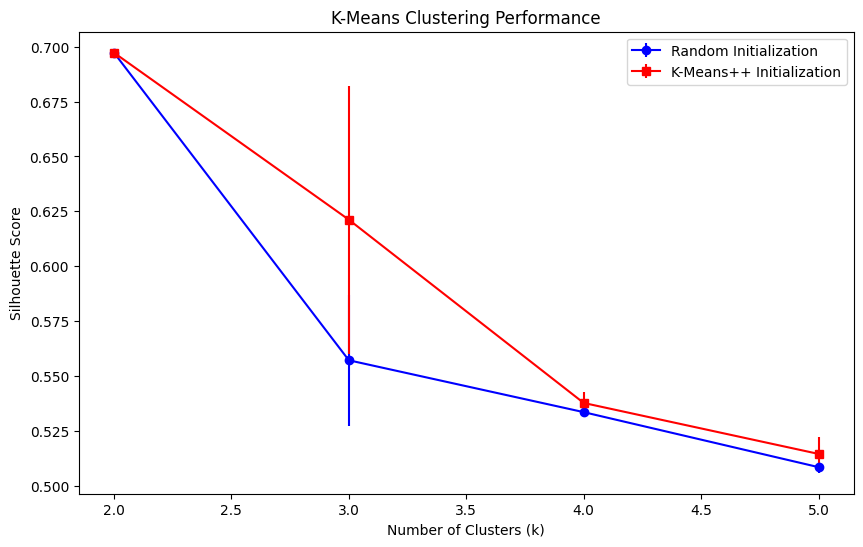

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(1, 6), [score[0] for score in random_silhouette_scores],
             yerr=[score[1] for score in random_silhouette_scores],
             label='Random Initialization', color='blue', marker='o')


plt.errorbar(range(1, 6), [score[0] for score in kmeans_plus_silhouette_scores],
             yerr=[score[1] for score in kmeans_plus_silhouette_scores],
             label='K-Means++ Initialization', color='red', marker='s')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-Means Clustering Performance')
plt.legend()
plt.show()

The silhouette score was computed for each clustering result.  The mean and standard deviation of the silhouette scores across the 10 repetitions were calculated for each k value.

The mean silhouette scores for both initialization methods were plotted against the number of clusters (k), with error bars representing the standard deviations.

 The optimal number of clusters (k) appears to be 2.  At this k value, the silhouette scores are highest for both initialization methods, indicating that the data points are well-clustered.

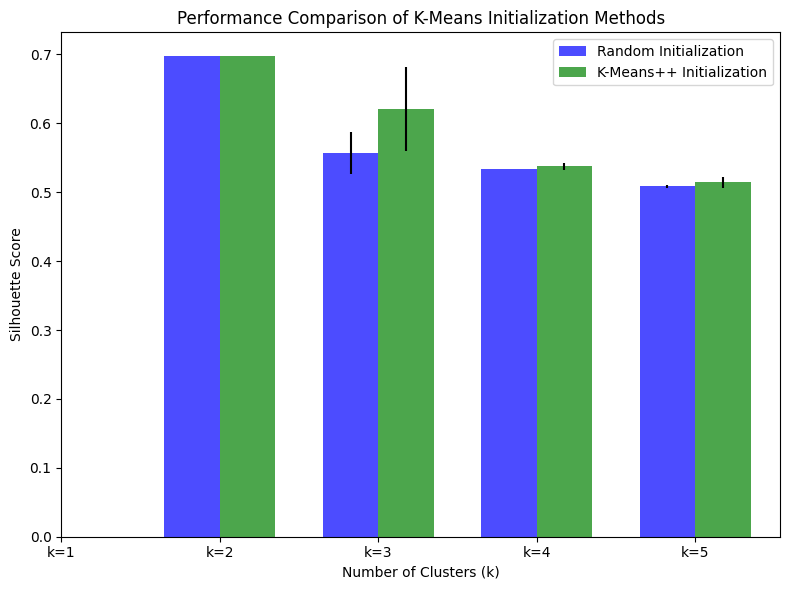

In [ ]:
from sklearn.preprocessing import StandardScaler
bar_width = 0.35
x_indices = np.arange(len(range(1, 6)))

plt.figure(figsize=(8, 6))

plt.bar(
    x_indices - bar_width / 2,
    [score[0] for score in random_silhouette_scores],
    yerr=[score[1] for score in random_silhouette_scores],
    width=bar_width,
    color='blue',
    alpha=0.7,
    label='Random Initialization'
)

plt.bar(
    x_indices + bar_width / 2,
    [score[0] for score in kmeans_plus_silhouette_scores],
    yerr=[score[1] for score in kmeans_plus_silhouette_scores],
    width=bar_width,
    color='green',
    alpha=0.7,
    label='K-Means++ Initialization'
)
plt.xticks(x_indices, [f"k={k}" for k in range(1, 6)])
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.title('Performance Comparison of K-Means Initialization Methods')
plt.legend()
plt.tight_layout()
plt.show()

This code visualizes the performance of random initialization and K-Means++ for K-Means clustering using a bar chart. For cluster counts (k) from 1 to 5, it plots the mean silhouette scores with error bars representing the standard deviations for both methods. Bars for random initialization and K-Means++ are displayed side by side for easy comparison. The chart includes labels, a legend, and a title for clarity.

## Q2 - Density-based clustering with DBSCAN

In [ ]:

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

X = StandardScaler().fit_transform(X)

class DBSCAN:
    def __init__(self, eps, min_pts):
        self.eps = eps
        self.min_pts = min_pts
        self.labels = None

    def _calculate_distances(self, X):
        return np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))

    def _region_query(self, distances):
        return [np.where(dist <= self.eps)[0] for dist in distances]

    def fit(self, X):

        n_samples = X.shape[0]
        distances = self._calculate_distances(X)
        neighbors = self._region_query(distances)

        self.labels = np.full(n_samples, -1)
        cluster_id = 0

        for point in range(n_samples):
            if self.labels[point] != -1:
                continue

            if len(neighbors[point]) >= self.min_pts:

                self.labels[point] = cluster_id

                seed_set = set(neighbors[point])
                while seed_set:
                    current_point = seed_set.pop()

                    if self.labels[current_point] == -1:
                        self.labels[current_point] = cluster_id

                    if len(neighbors[current_point]) >= self.min_pts:
                        for neighbor in neighbors[current_point]:
                            if self.labels[neighbor] == -1:
                                self.labels[neighbor] = cluster_id
                                seed_set.add(neighbor)

                cluster_id += 1

        return self.labels

    def get_n_clusters(self):
        return len(set(self.labels[self.labels != -1]))



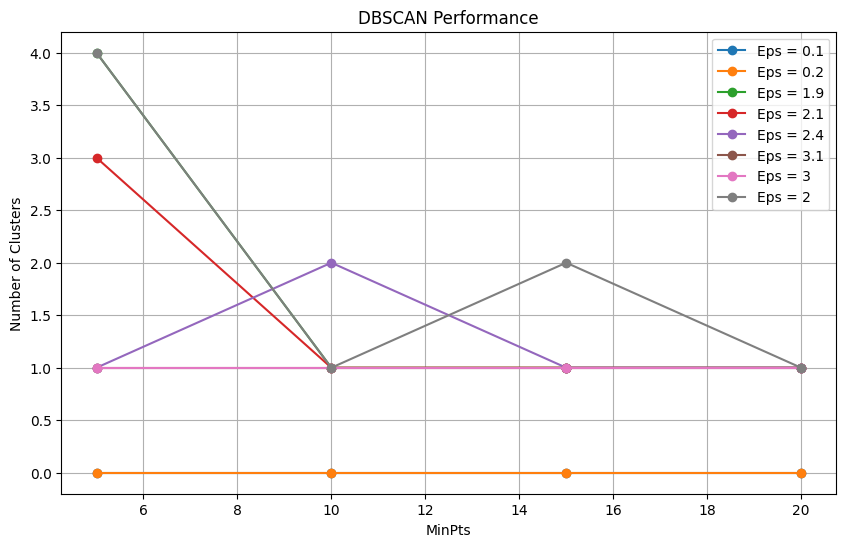

Cluster Analysis for Breast Cancer Dataset:
Eps = 0.1, MinPts = 5:
  Number of clusters: 0

Eps = 0.1, MinPts = 10:
  Number of clusters: 0

Eps = 0.1, MinPts = 15:
  Number of clusters: 0

Eps = 0.1, MinPts = 20:
  Number of clusters: 0

Eps = 0.2, MinPts = 5:
  Number of clusters: 0

Eps = 0.2, MinPts = 10:
  Number of clusters: 0

Eps = 0.2, MinPts = 15:
  Number of clusters: 0

Eps = 0.2, MinPts = 20:
  Number of clusters: 0

Eps = 1.9, MinPts = 5:
  Number of clusters: 4

Eps = 1.9, MinPts = 10:
  Number of clusters: 1

Eps = 1.9, MinPts = 15:
  Number of clusters: 1

Eps = 1.9, MinPts = 20:
  Number of clusters: 1

Eps = 2.1, MinPts = 5:
  Number of clusters: 3

Eps = 2.1, MinPts = 10:
  Number of clusters: 1

Eps = 2.1, MinPts = 15:
  Number of clusters: 1

Eps = 2.1, MinPts = 20:
  Number of clusters: 1

Eps = 2.4, MinPts = 5:
  Number of clusters: 1

Eps = 2.4, MinPts = 10:
  Number of clusters: 2

Eps = 2.4, MinPts = 15:
  Number of clusters: 1

Eps = 2.4, MinPts = 20:
  Numb

In [ ]:
def performance_analysis(X):
    eps_values = [0.1,0.2,1.9,2.1,2.4,3.1,3,2]
    min_pts_values = [5, 10, 15,20]

    plt.figure(figsize=(10, 6))

    for eps in eps_values:
        n_clusters_list = []

        for min_pts in min_pts_values:
            dbscan = DBSCAN(eps=eps, min_pts=min_pts)
            dbscan.fit(X)

            n_clusters_list.append(dbscan.get_n_clusters())

        label = f'Eps = {eps}'
        plt.plot(min_pts_values, n_clusters_list, marker='o', label=label)

    plt.title('DBSCAN Performance')
    plt.xlabel('MinPts')
    plt.ylabel('Number of Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

performance_analysis(X)

def additional_cluster_analysis():
    eps_values = [0.1,0.2,1.9,2.1,2.4,3.1,2]
    min_pts_values = [5, 10, 15,20]

    print("Cluster Analysis for Breast Cancer Dataset:")
    for eps in eps_values:
        for min_pts in min_pts_values:
            dbscan = DBSCAN(eps=eps, min_pts=min_pts)
            labels = dbscan.fit(X)

            n_clusters = dbscan.get_n_clusters()
            n_noise = np.sum(labels == -1)

            print(f"Eps = {eps}, MinPts = {min_pts}:")
            print(f"  Number of clusters: {n_clusters}")
            print()

additional_cluster_analysis()

This code implements the DBSCAN clustering algorithm and analyzes its performance on the Breast Cancer Wisconsin Diagnostic dataset. After preprocessing the data with standard scaling, a custom DBSCAN class is defined to assign cluster labels based on neighborhood density. The performance_analysis function visualizes the number of clusters formed for varying eps and min_pts parameters. Additionally, the additional_cluster_analysis function provides detailed insights into the number of clusters, noise points, and noise percentage for each combination of parameters, summarizing DBSCAN's behavior on the dataset.

## Q3 - Graph-based clustering with Spectral Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class SpectralClustering:
    def __init__(self, k, sigma):

        self.k = k
        self.sigma = sigma
        self.labels = None

    def _gaussian_similarity(self, X):

        n_samples = X.shape[0]

        distances = np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))

        W = np.exp(-(distances ** 2) / (2 * (self.sigma ** 2)))

        return W

    def _compute_laplacian(self, W):

        D = np.diag(W.sum(axis=1))

        L = D - W

        return L

    def fit(self, X):

        W = self._gaussian_similarity(X)

        L = self._compute_laplacian(W)

        eigenvalues, eigenvectors = np.linalg.eig(L)

        idx = eigenvalues.argsort()

        V = eigenvectors[:, idx[1:self.k+1]].real

        V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]

        self.labels=lloyd_kmeans(V_normalized, self.k, init_method='random')[0]

        if self.labels.ndim != 1:
            # If not, try to reshape it
            try:
                self.labels = self.labels.reshape(-1)
            except ValueError:
                raise ValueError("lloyd_kmeans output could not be reshaped to 1D")


        return self.labels

    def get_n_clusters(self):

        return self.k



<ipython-input-74-d6eb8498e0b8>:42: RuntimeWarning: divide by zero encountered in divide
  V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]
<ipython-input-74-d6eb8498e0b8>:42: RuntimeWarning: invalid value encountered in divide
  V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]
<ipython-input-68-96b78fa0067a>:38: RuntimeWarning: invalid value encountered in subtract
  distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-74-d6eb8498e0b8>:42: RuntimeWarning: divide by zero encountered in divide
  V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]
<ipython-input-74-d6eb8498e0b8>:42: RuntimeWarning: invalid value encountered in divide
  V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]
<ipython-input-68-96b78fa0067a>:41: RuntimeWarning: Mean

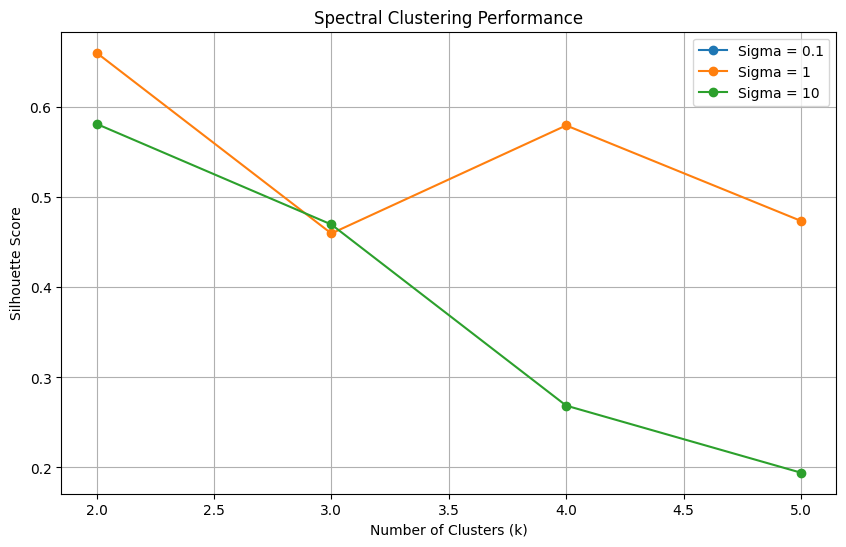

Detailed Spectral Clustering Analysis:

Sigma = 0.1


<ipython-input-74-d6eb8498e0b8>:42: RuntimeWarning: divide by zero encountered in divide
  V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]
<ipython-input-74-d6eb8498e0b8>:42: RuntimeWarning: invalid value encountered in divide
  V_normalized = V / np.linalg.norm(V, axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  k = 1:
    Number of unique clusters: 1
    Cluster 0: 569 points


<ipython-input-68-96b78fa0067a>:38: RuntimeWarning: invalid value encountered in subtract
  distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
<ipython-input-68-96b78fa0067a>:41: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[cluster_assignments == i].mean(axis=0) for i in range(n_clusters)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  k = 2:
    Number of unique clusters: 1
    Cluster 0: 569 points
  k = 3:
    Number of unique clusters: 1
    Cluster 0: 569 points
  k = 4:
    Number of unique clusters: 1
    Cluster 0: 569 points
  k = 5:
    Number of unique clusters: 1
    Cluster 0: 569 points

Sigma = 1
  k = 1:
    Number of unique clusters: 1
    Cluster 0: 569 points
  k = 2:
    Number of unique clusters: 2
    Cluster 0: 2 points
    Cluster 1: 567 points
  k = 3:
    Number of unique clusters: 3
    Cluster 0: 3 points
    Cluster 1: 565 points
    Cluster 2: 1 points
  k = 4:
    Number of unique clusters: 4
    Cluster 0: 2 points
    Cluster 1: 2 points
    Cluster 2: 563 points
    Cluster 3: 2 points
  k = 5:
    Number of unique clusters: 5
    Cluster 0: 1 points
    Cluster 1: 1 points
    Cluster 2: 2 points
    Cluster 3: 1 points
    Cluster 4: 564 points

Sigma = 10
  k = 1:
    Number of unique clusters: 1
    Cluster 0: 569 points
  k = 2:
    Number of unique clusters: 2
    Cluster 0: 

In [ ]:
def performance_analysis():

    k_values = range(1, 6)
    sigma_values = [0.1, 1, 10]

    plt.figure(figsize=(10, 6))

    for sigma in sigma_values:
        silhouette_scores = []

        for k in k_values:

            spectral = SpectralClustering(k=k, sigma=sigma)
            labels = spectral.fit(X)

            from sklearn.metrics import silhouette_score
            try:
                score = silhouette_score(X, labels)
                silhouette_scores.append(score)
            except ValueError:
                silhouette_scores.append(np.nan)

        label = f'Sigma = {sigma}'
        plt.plot(k_values, silhouette_scores, marker='o', label=label)

    plt.title('Spectral Clustering Performance')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

def detailed_cluster_analysis():

    print("Detailed Spectral Clustering Analysis:")
    sigma_values = [0.1, 1, 10]
    k_values = range(1, 6)

    for sigma in sigma_values:
        print(f"\nSigma = {sigma}")
        for k in k_values:

            spectral = SpectralClustering(k=k, sigma=sigma)
            labels = spectral.fit(X)
            unique_labels = np.unique(labels)

            print(f"  k = {k}:")
            print(f"    Number of unique clusters: {len(unique_labels)}")

            for cluster in unique_labels:
                cluster_size = np.sum(labels == cluster)
                print(f"    Cluster {cluster}: {cluster_size} points")

performance_analysis()
detailed_cluster_analysis()


The code implements a Spectral Clustering algorithm that uses Gaussian similarity and Laplacian eigenvectors for clustering, with K-Means applied to the normalized eigenvectors. It evaluates performance using silhouette scores across different cluster counts (k) and kernel parameters (sigma), visualized in a plot. Additionally, it provides detailed cluster statistics, including the number and sizes of clusters for various configurations.

## Q4 - Anomaly detection with the Isolation Forest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Isolation Forest
class IsolationTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.feature = None
        self.split_value = None
        self.left = None
        self.right = None
        self.size = 0

    def fit(self, X, current_depth=0):
        self.size = len(X)
        if current_depth >= self.max_depth or self.size <= 1:
            return
        self.feature = np.random.randint(0, X.shape[1])
        min_val, max_val = X[:, self.feature].min(), X[:, self.feature].max()
        self.split_value = np.random.uniform(min_val, max_val)
        left_mask = X[:, self.feature] < self.split_value
        self.left = IsolationTree(self.max_depth)
        self.left.fit(X[left_mask], current_depth + 1)
        self.right = IsolationTree(self.max_depth)
        self.right.fit(X[~left_mask], current_depth + 1)

    def path_length(self, x, current_depth=0):
        if self.left is None or self.right is None:
            return current_depth + self._c(self.size)
        if x[self.feature] < self.split_value:
            return self.left.path_length(x, current_depth + 1)
        else:
            return self.right.path_length(x, current_depth + 1)

    def _c(self, n):
        if n <= 1:
            return 0
        return 2 * (np.log(n - 1) + 0.5772156649) - (2 * (n - 1) / n)

class IsolationForest:
    def __init__(self, n_trees=100, max_depth=10, sample_size=256):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def fit(self, X):
        self.trees = []
        for _ in range(self.n_trees):
            sample_indices = np.random.choice(X.shape[0], self.sample_size, replace=False)
            sample = X[sample_indices]
            tree = IsolationTree(self.max_depth)
            tree.fit(sample)
            self.trees.append(tree)

    def anomaly_score(self, X):
        scores = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            path_lengths = [tree.path_length(x) for tree in self.trees]
            scores[i] = 2 ** (-np.mean(path_lengths) / self._c(self.sample_size))
        return scores

    def _c(self, n):
        if n <= 1:
            return 0
        return 2 * (np.log(n - 1) + 0.5772156649) - (2 * (n - 1) / n)

# K-means++ Implementation (from scratch)
def initialize_centroids(X, k):
    centroids = [X[np.random.choice(X.shape[0])]]
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(X - centroid, axis=1)**2 for centroid in centroids], axis=0)
        probabilities = distances / distances.sum()
        new_centroid = X[np.random.choice(X.shape[0], p=probabilities)]
        centroids.append(new_centroid)
    return np.array(centroids)

def k_means_pp(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids]).T
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    ssd = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(k)])
    return ssd



# Isolation Forest
iso_forest = IsolationForest(n_trees=50, max_depth=10, sample_size=256)
iso_forest.fit(X)
scores = iso_forest.anomaly_score(X)

# Percentiles for anomalies
percentiles = [1, 5, 10, 15]
performance = []

for percentile in percentiles:
    threshold = np.percentile(scores, 100 - percentile)
    filtered_X = X[scores <= threshold]  # Remove top anomalies
    ssd = k_means_pp(filtered_X, k=2)
    performance.append(ssd)




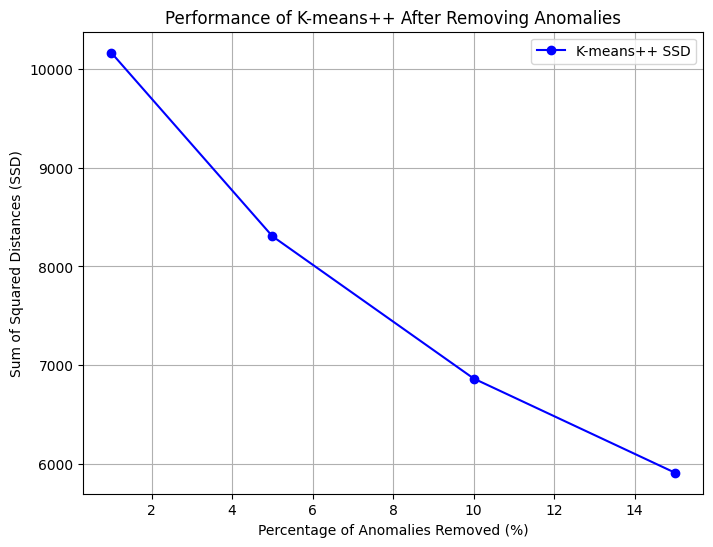

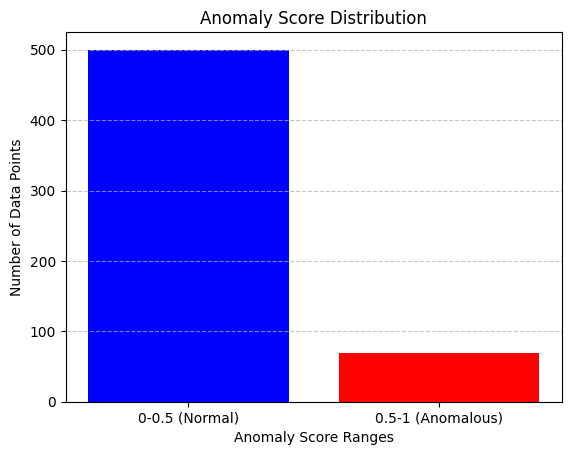

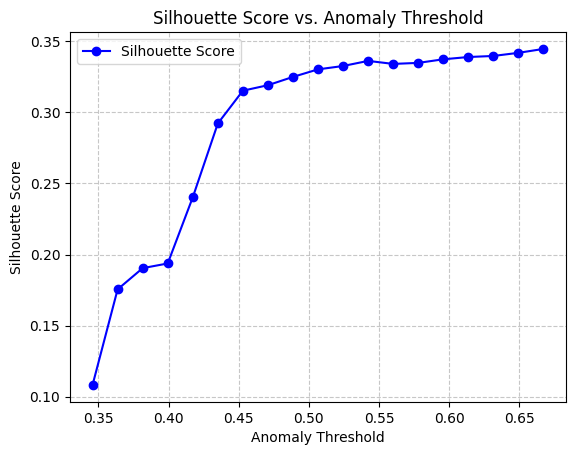

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.plot(percentiles, performance, marker='o', linestyle='-', color='b', label='K-means++ SSD')
plt.title("Performance of K-means++ After Removing Anomalies")
plt.xlabel("Percentage of Anomalies Removed (%)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.grid(True)
plt.legend()
plt.show()


# Calculate anomaly scores
scores = iso_forest.anomaly_score(X)

# Define bins
bins = [0, 0.5, 1]
labels = ['0-0.5 (Normal)', '0.5-1 (Anomalous)']

# Assign scores to bins
categories = np.digitize(scores, bins) - 1  # Map scores to bins (0 for 0-0.5, 1 for 0.5-1)

# Count data points in each bin
counts = [np.sum(categories == i) for i in range(len(bins) - 1)]

# Plot a bar chart
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Anomaly Score Ranges')
plt.ylabel('Number of Data Points')
plt.title('Anomaly Score Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


from sklearn.metrics import silhouette_score

# Updated K-means++ to return labels
def k_means_pp_with_labels(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    labels = np.zeros(X.shape[0], dtype=int)
    for _ in range(max_iters):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids]).T
        new_labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[new_labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
        labels = new_labels
    return labels

# Define thresholds for anomaly removal
thresholds = np.linspace(min(scores), max(scores), 20)  # 20 evenly spaced thresholds
silhouette_scores = []

for threshold in thresholds:
    # Filter data based on threshold
    filtered_X = X[scores <= threshold]

    # Skip calculation if not enough points for clustering
    if len(filtered_X) < 2:
        silhouette_scores.append(None)
        continue

    # Apply K-means++ and get labels
    labels = k_means_pp_with_labels(filtered_X, k=2)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(filtered_X, labels)
    silhouette_scores.append(silhouette_avg)

# Remove None values for plotting
valid_thresholds = [thresholds[i] for i in range(len(thresholds)) if silhouette_scores[i] is not None]
valid_silhouette_scores = [s for s in silhouette_scores if s is not None]

# Plot Silhouette Score vs. Threshold
plt.plot(valid_thresholds, valid_silhouette_scores, marker='o', color='blue', label='Silhouette Score')
plt.xlabel('Anomaly Threshold')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Anomaly Threshold')
plt.grid(alpha=0.7, linestyle='--')
plt.legend()
plt.show()


import matplotlib.pyplot as plt

# Determine a threshold for anomalies (e.g., top 5% anomalies)
threshold = np.percentile(scores, 95)
anomalies = X[scores > threshold]
normal_points = X[scores <= threshold]





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This code uses Isolation Forest to detect anomalies and K-Means++ to evaluate clustering performance after removing anomalies. Anomaly scores are categorized, and their impact on clustering is analyzed by measuring the Sum of Squared Distances (SSD) and Silhouette Score. Visualizations include anomaly score distributions, SSD vs. anomaly removal percentages, and Silhouette Scores across thresholds. The analysis highlights how filtering anomalies improves clustering quality and data separation.

# References / Disclosures

1. Scikit-learn Documentation: "Cross-validation: evaluating estimator performance." Scikit-learn 1.1.0 documentation.

 https://scikit-learn.org/stable/modules/cross_validation.html.

2. Imbalanced-learn Documentation. "SMOTE: Synthetic Minority Over-sampling Technique." Imbalanced-learn 0.9.1 documentation.

 https://imbalanced-learn.org/stable/over_sampling.html.

3. Matplotlib Documentation: "Error bars." Matplotlib 3.5.1 documentation. https://matplotlib.org/stable/gallery/statistics/errorbar_features.html.

4. GeeksforGeeks. (2024, March 19). Feature Selection Techniques in Machine Learning. Retrieved from

  https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/

5. Your Data Teacher. (2021, October 11). Feature selection with Random Forest. Retrieved from

  https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/

6. This blog post explains how to code a decision tree in Python from scratch, covering the key concepts and implementation details:
https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

7. The video "Decision Tree Classification in Python (from scratch!)"
 (https://www.youtube.com/watch?v=sgQAhG5Q7iY)

8. Built In - Gaussian Naive Bayes Explained With Scikit-Learn

  https://builtin.com/artificial-intelligence/gaussian-naive-bayes

9. GeeksforGeeks - Gaussian Naive Bayes

  https://www.geeksforgeeks.org/gaussian-naive-bayes/

10. NumPy documentation for array operations:
https://numpy.org/doc/stable/reference/arrays.html

11. UCI Machine Learning Repository (for dataset information):
https://archive.ics.uci.edu/ml/index.php

12. Scikit-learn documentation on metrics (for F1 score):

 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

13. Scikit-learn documentation on TruncatedSVD

  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

14. SVD tutorial

  https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv